## Black friday dataset EDA and feature engg.
### cleaning and preparing the data for model trainnig

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem Statement:
    
The dataset here is a sample of the transactions made in a retail store.
The store wants to know better the customer purchase behaviour against different products.
Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.
There are seven categorical variables to analyse.
Let us list down some points that can be addressed with the analsysis.

Understanding the cutomers on the basis of their purchasing habits.
Understanding the purchasing habits according to Age groups, Occuptation, City_Categories.
The above segmented group of users can be then used to model the data and use to predict the purchase spend for each customer. Lets dive in by understanding the data.

In [2]:
#importing dataset
df_train = pd.read_csv('/Users/abhinavpandey/Desktop/Python/datasets/Black friday/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
## import test data
df_test = pd.read_csv('/Users/abhinavpandey/Desktop/Python/datasets/Black friday/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
## merge both train and test data for data preprocessing
df = df_train.append(df_test)
df.head()

/var/folders/yv/whxszfm91xv1g1rnd06c0nxw0000gn/T/ipykernel_16291/3487125433.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
#drop userid since no use
df.drop('User_ID',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
# checking for duplicates
df.duplicated().sum()

15967

In [9]:
# dropping duplicates values
df.drop_duplicates(keep='last',inplace=True)
df.duplicated().sum()

0

In [10]:
#ifb we use this then we have to cancat this column into og df, then delete that age column instead of this 
#we will use map fun in which we will conver M/F in 1/0 resp. in their axis=1.
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [11]:
#handling categorical feature gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
#handle categorical feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
#we can use label encoding by using scikit learn library , or esle pandas map it manually.
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
# #2nd technique
# #label encoding
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# # apply on df
# df['Age'] = encoder.fit_transform(df['Age'])

# df['Age'].unique()

In [15]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
#fixing categorical City_category
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [17]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [18]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
# now we can drop city category since we made dummy for that axis
df.drop('City_Category',axis=1,inplace=True)

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [21]:
# missing values check
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            242509
Product_Category_3            536383
Purchase                      217745
B                                  0
C                                  0
dtype: int64

In [22]:
## focus on replacing missing values
df['Product_Category_2'].unique()
#if nan on dicrete values, then use mode

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df['Product_Category_2'].value_counts()

8.0     89400
14.0    77412
2.0     68078
16.0    60340
15.0    52525
5.0     36393
4.0     35946
6.0     23003
11.0    19708
17.0    18725
13.0    14769
9.0      8004
12.0     7738
10.0     4318
3.0      4023
18.0     3962
7.0       847
Name: Product_Category_2, dtype: int64

In [24]:
#if we use this df['Product_Category_2'].mode() , we will get series so to select from we use indexing
df['Product_Category_2'].mode()[0]

8.0

In [25]:
# replacing missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [26]:
df['Product_Category_2'].isna().sum()

0

In [27]:
#product category3 replace missing values
print(df['Product_Category_3'].unique())
print(df['Product_Category_3'].value_counts())

[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
16.0    45199
15.0    38777
14.0    25745
17.0    23119
5.0     23016
8.0     17357
9.0     15986
12.0    12859
13.0     7635
6.0      6669
18.0     6471
4.0      2657
11.0     2530
10.0     2436
3.0       861
Name: Product_Category_3, dtype: int64


In [28]:
# replacing missing values with mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [30]:
#Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

/var/folders/yv/whxszfm91xv1g1rnd06c0nxw0000gn/T/ipykernel_16291/66897005.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')


In [32]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [33]:
# gender treated, age treated , nan values , duplicates removed treated

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767700 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  767700 non-null  object 
 1   Gender                      767700 non-null  int64  
 2   Age                         767700 non-null  int64  
 3   Occupation                  767700 non-null  int64  
 4   Stay_In_Current_City_Years  767700 non-null  object 
 5   Marital_Status              767700 non-null  int64  
 6   Product_Category_1          767700 non-null  int64  
 7   Product_Category_2          767700 non-null  float64
 8   Product_Category_3          767700 non-null  float64
 9   Purchase                    549955 non-null  float64
 10  B                           767700 non-null  uint8  
 11  C                           767700 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 65.9+ MB


In [35]:
# we will do type casting for Stay_In_Current_City_Years str----> int
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767700 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  767700 non-null  object 
 1   Gender                      767700 non-null  int64  
 2   Age                         767700 non-null  int64  
 3   Occupation                  767700 non-null  int64  
 4   Stay_In_Current_City_Years  767700 non-null  int64  
 5   Marital_Status              767700 non-null  int64  
 6   Product_Category_1          767700 non-null  int64  
 7   Product_Category_2          767700 non-null  float64
 8   Product_Category_3          767700 non-null  float64
 9   Purchase                    549955 non-null  float64
 10  B                           767700 non-null  uint8  
 11  C                           767700 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 65.9+ MB


In [36]:
#converting uint8(ranges from  zero to +) to int64(bigint ranges from - to ; very large values)
df['B'] = df['B'].astype(int)
df.C = df.C.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767700 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  767700 non-null  object 
 1   Gender                      767700 non-null  int64  
 2   Age                         767700 non-null  int64  
 3   Occupation                  767700 non-null  int64  
 4   Stay_In_Current_City_Years  767700 non-null  int64  
 5   Marital_Status              767700 non-null  int64  
 6   Product_Category_1          767700 non-null  int64  
 7   Product_Category_2          767700 non-null  float64
 8   Product_Category_3          767700 non-null  float64
 9   Purchase                    549955 non-null  float64
 10  B                           767700 non-null  int64  
 11  C                           767700 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 76.1+ MB


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age', ylabel='Purchase'>

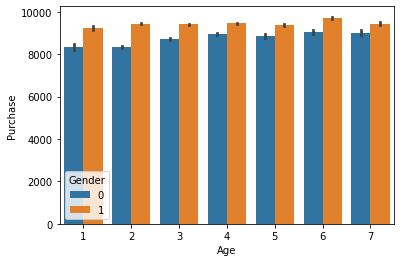

In [37]:
#visualization age vs purchase
sns.barplot('Age','Purchase',hue='Gender',data=df)

***observation:***

1. purchase of men is higher than women 
2. age segment of 6 i.e.51-55 has highest no. of purchases

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Occupation', ylabel='Purchase'>

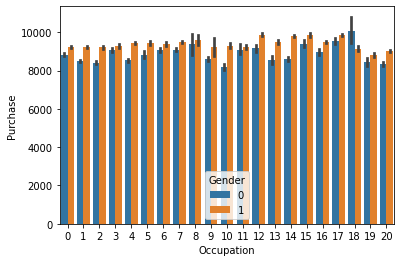

In [38]:
# visulaization of purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

***observations:***
1. 18 no.of category is more active on purchases, that too female employees in that particular occupation

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_1', ylabel='Purchase'>

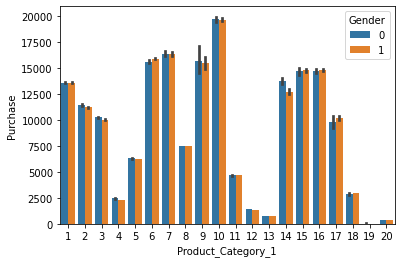

In [39]:
#visualization product category 1 vs purchase
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

***observations:***
1. most selling product from category 1 is 10th no.
2. least selling in this category is 19th no.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

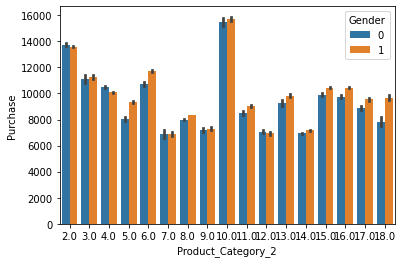

In [40]:
#visualization product category 2 vs purchase
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

***observations:***
1. most selling from this segment is 10th no.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_3', ylabel='Purchase'>

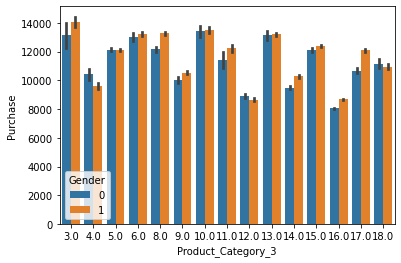

In [41]:
#visualization product category 3 vs purchase
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

***observations:***
1. product categ1 is the most selling in all 3 categories then 3rd and then at last 2nd.


In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [43]:
df.drop('Product_ID',axis=1,inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [44]:
##feature scaling
df_test = df[df['Purchase'].isna()]

In [45]:
df_train = df[~df['Purchase'].isnull()]

In [46]:
X = df_train.drop('Purchase',axis=1)

In [47]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [48]:
Y =df_train['Purchase']

In [49]:
Y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [51]:
#feature scaling - standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### train model  thanks